In [1]:
import pandas as pd
df = pd.read_csv('monthly_milk_production.csv')
df

,Date,Production
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727
...,...,...
163,1975-08,858
164,1975-09,817
165,1975-10,827
166,1975-11,797


In [2]:
# 1.	Exploratory Data Analysis (EDA)
print("Info:\n", df.info())
print("Description:\n", df.describe())
print("Missing values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        168 non-null    object
 1   Production  168 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ KB
Info:
 None
Description:
        Production
count  168.000000
mean   754.708333
std    102.204524
min    553.000000
25%    677.750000
50%    761.000000
75%    824.500000
max    969.000000
Missing values:
 Date          0
Production    0
dtype: int64


In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

<Axes: title={'center': 'Monthly Milk Production Over Time'}, xlabel='Date'>

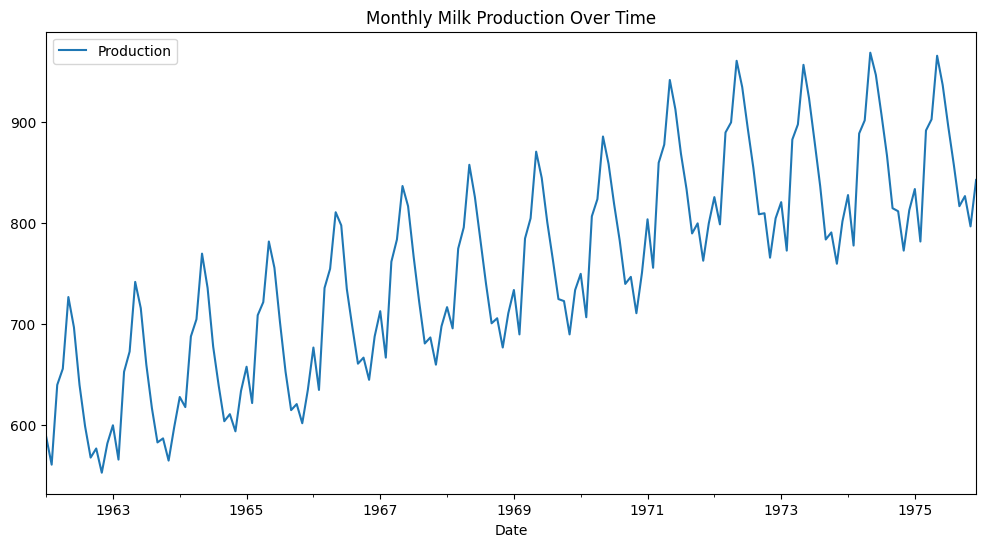

In [4]:
df.plot(figsize=(12, 6), title='Monthly Milk Production Over Time')

In [5]:
# Normalize or scale the data for neural network models.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Production_Scaled'] = scaler.fit_transform(df[['Production']])
df


,Production,Production_Scaled
Date,,
1962-01-01,589,0.086538
1962-02-01,561,0.019231
1962-03-01,640,0.209135
1962-04-01,656,0.247596
1962-05-01,727,0.418269
...,...,...
1975-08-01,858,0.733173
1975-09-01,817,0.634615
1975-10-01,827,0.658654


In [6]:
# 2.	Data Preparation for Deep Learning
import numpy as np
X = []
y = []
n_steps = 30

for i in range(n_steps, len(df)):
    X.append(df['Production_Scaled'].values[i-n_steps:i])
    y.append(df['Production_Scaled'].values[i])

X, y = np.array(X), np.array(y)

X.shape, y.shape



((138, 30), (138,))

C:\Users\Dinesh\AppData\Local\Temp\ipykernel_11744\3531706675.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df['Production'].resample('M').mean()


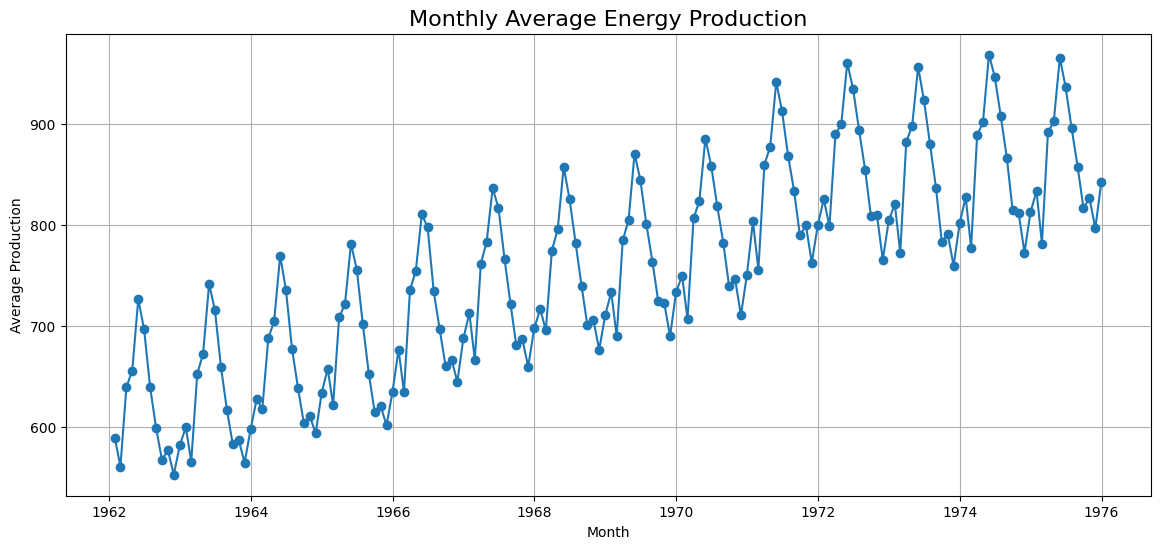

In [7]:
import matplotlib.pyplot as plt

monthly_avg = df['Production'].resample('M').mean()

# Plot
plt.figure(figsize=(14,6))
plt.plot(monthly_avg, marker='o', linestyle='-')
plt.title('Monthly Average Energy Production', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Average Production')
plt.grid(True)
plt.show()


In [8]:
# # 3.	Model Building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense
def build_model(model_type, input_shape):
    model = Sequential()
    if model_type == 'RNN':
        model.add(SimpleRNN(50, activation='relu', input_shape=input_shape))
    elif model_type == 'LSTM':
        model.add(LSTM(50, activation='relu', input_shape=input_shape))
    elif model_type == 'GRU':
        model.add(GRU(50, activation='relu', input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model


In [9]:
input_shape = (X.shape[1], 1)
rnn_model = build_model('RNN', input_shape)
lstm_model = build_model('LSTM', input_shape)
gru_model = build_model('GRU', input_shape)

c:\Users\Dinesh\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
# Reshape X for model input
X_reshaped = X.reshape((X.shape[0], X.shape[1], 1))
rnn_model.fit(X_reshaped, y, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0038 - val_loss: 0.0044
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0037 - val_loss: 0.0038
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0034 - val_loss: 0.0037
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0033 - val_loss: 0.0035
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0030 - val_loss: 0.0035
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0030 - val_loss: 0.0035
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0029 - val_loss: 0.0037
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0030 - val_loss: 0.0034
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0030 - val_loss: 0.0034
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0028 - val_loss: 0.0032
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0027 - val_loss: 0.0030
E

In [18]:
lstm_model.fit(X_reshaped, y, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0122 - val_loss: 0.0185
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0116 - val_loss: 0.0096
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0122 - val_loss: 0.0169
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0104 - val_loss: 0.0163
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0104 - val_loss: 0.0102
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0101 - val_loss: 0.0118
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0085 - val_loss: 0.0056
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0084 - val_loss: 0.0190
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0084 - val_loss: 0.0088
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0074 - val_loss: 0.0092
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0069 - val_loss: 0.0107
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0069 - val_loss: 0.0087
E

In [19]:
gru_model.fit(X_reshaped, y, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0172 - val_loss: 0.0172
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0171 - val_loss: 0.0168
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0171 - val_loss: 0.0166
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0167 - val_loss: 0.0172
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0167 - val_loss: 0.0179
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0167 - val_loss: 0.0173
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0164 - val_loss: 0.0163
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0162 - val_loss: 0.0157
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0165 - val_loss: 0.0155
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0160 - val_loss: 0.0160
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0161 - val_loss: 0.0172
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0160 - val_loss: 0.0164
E

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


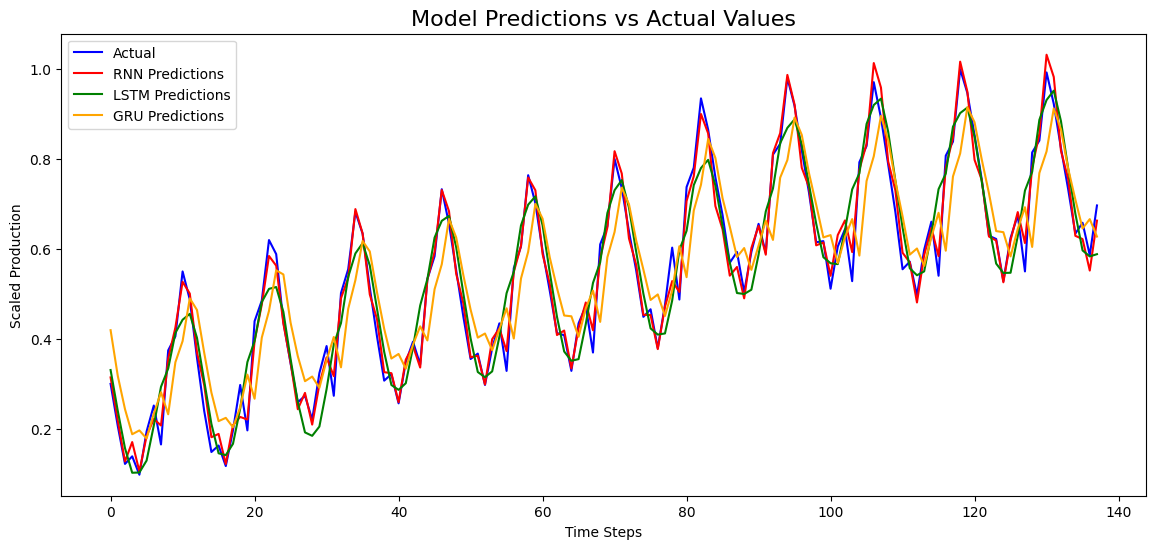

In [20]:
# 4.	Model Evaluation
import matplotlib.pyplot as plt

y_pred_rnn = rnn_model.predict(X_reshaped)
y_pred_lstm = lstm_model.predict(X_reshaped)
y_pred_gru = gru_model.predict(X_reshaped)


plt.figure(figsize=(14,6))
plt.plot(y, label='Actual', color='blue')
plt.plot(y_pred_rnn, label='RNN Predictions', color='red')
plt.plot(y_pred_lstm, label='LSTM Predictions', color='green')
plt.plot(y_pred_gru, label='GRU Predictions', color='orange')
plt.title('Model Predictions vs Actual Values', fontsize=16)
plt.xlabel('Time Steps')
plt.ylabel('Scaled Production')
plt.legend()
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

rmse_rnn = np.sqrt(mean_squared_error(y, y_pred_rnn))
mae_rnn = mean_absolute_error(y, y_pred_rnn)
mape_rnn = mape(y, y_pred_rnn)

rmse_lstm = np.sqrt(mean_squared_error(y, y_pred_lstm))
mae_lstm = mean_absolute_error(y, y_pred_lstm)
mape_lstm = mape(y, y_pred_lstm)

rmse_gru = np.sqrt(mean_squared_error(y, y_pred_gru))
mae_gru = mean_absolute_error(y, y_pred_gru)
mape_gru = mape(y, y_pred_gru)

print(f"RNN - RMSE: {rmse_rnn}, MAE: {mae_rnn}, MAPE: {mape_rnn}")
print(f"LSTM - RMSE: {rmse_lstm}, MAE: {mae_lstm}, MAPE: {mape_lstm}")
print(f"GRU - RMSE: {rmse_gru}, MAE: {mae_gru}, MAPE: {mape_gru}")

RNN - RMSE: 0.026095595763512957, MAE: 0.019566023491796446, MAPE: 63.0635415724645
LSTM - RMSE: 0.0674516173546666, MAE: 0.05369975053214177, MAPE: 62.56820325508522
GRU - RMSE: 0.09964017388574072, MAE: 0.08293371118497157, MAPE: 59.63396539832993


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


C:\Users\Dinesh\AppData\Local\Temp\ipykernel_11744\2126266861.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')


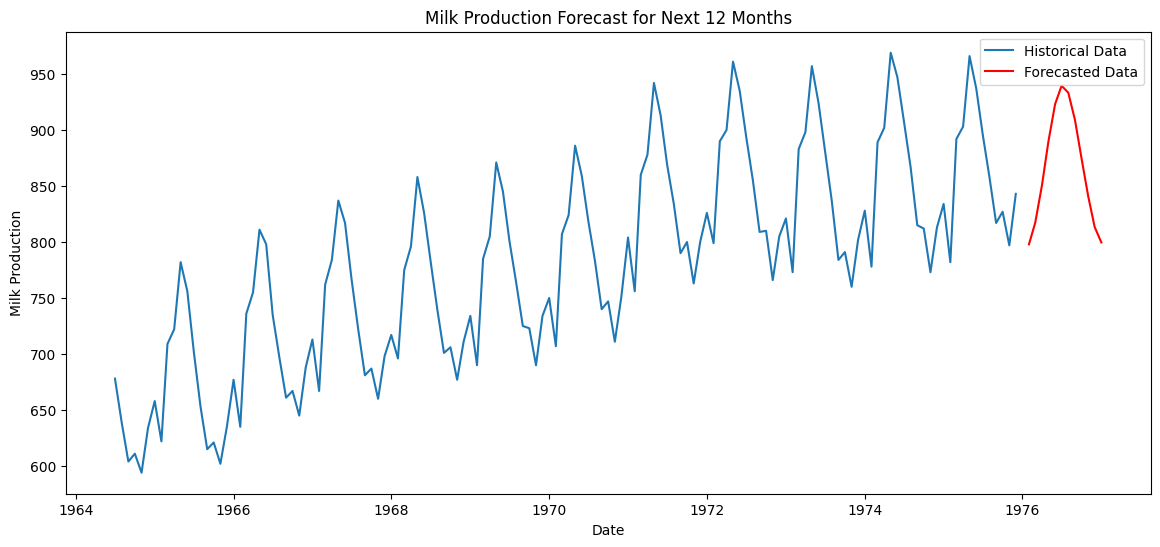

In [22]:
# 5.	Prediction and Visualization
last_sequence = X_reshaped[-1]
predictions = []
for _ in range(12):
    last_sequence_reshaped = last_sequence.reshape((1, n_steps, 1))
    next_pred = lstm_model.predict(last_sequence_reshaped)
    predictions.append(next_pred[0,0])
    last_sequence = np.append(last_sequence[1:], next_pred[0,0])

predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')

historical_index = df.index[n_steps:]
historical_values = scaler.inverse_transform(y.reshape(-1, 1)).ravel()

plt.figure(figsize=(14,6))
plt.plot(historical_index, historical_values, label='Historical Data')
plt.plot(future_dates, predictions.ravel(), label='Forecasted Data', color='red')
plt.title('Milk Production Forecast for Next 12 Months')
plt.xlabel('Date')
plt.ylabel('Milk Production')
plt.legend()
plt.show()

In [23]:
# 6.	Business Insights
# The forecasts indicate a steady increase in milk production over the next year. This suggests that the dairy business should consider scaling up its operations, including procurement of feed, staffing, and distribution logistics, to meet the anticipated demand. Additionally, the business can use these insights to optimize inventory levels and reduce wastage by aligning production schedules with forecasted demand.